#Kelly’s Ice Cream Shop Discount Analysis

#Part 1 – Basic Data Understanding (Pandas)

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df=pd.read_csv('C:/Users/kishore/AI WORKFORCE/kellys_icecream_dataset.csv')
print(df.head(10))
print(f'Shape:{df.shape}\n')
print(f'Column names: {df.columns}\n')
print(f'Data types:\n{df.dtypes}\n')
df.isnull().sum()  #check missing values
df.duplicated().sum()  #check duplicate
print(df['amount'].describe())

   customer_id  transaction_id  amount
0         1001          339473      89
1         1002          359433       5
2         1003           43176      52
3         1004           27169      19
4         1001          530588       4
5         1004          528902      78
6         1005          584167      72
7         1003           55479      45
8         1005          500607      98
9         1004          544617      65
Shape:(100, 3)

Column names: Index(['customer_id', 'transaction_id', 'amount'], dtype='object')

Data types:
customer_id       int64
transaction_id    int64
amount            int64
dtype: object

count    100.000000
mean      54.850000
std       27.635205
min        4.000000
25%       39.000000
50%       52.000000
75%       78.000000
max       98.000000
Name: amount, dtype: float64


#Part 2 – EDA (Exploratory Data Analysis)

Count the total number of transactions per customer.

In [34]:
a=df.groupby('customer_id')['transaction_id'].count().reset_index()
print(a)

   customer_id  transaction_id
0         1001              22
1         1002              17
2         1003              15
3         1004              20
4         1005              26


Find the 3rd transaction for each customer based on transaction_id ordering.

In [35]:
b = df.sort_values(by='transaction_id').groupby('customer_id').nth(2)
print(b)

    customer_id  transaction_id  amount
20         1003          102487      39
10         1001          374711      94
15         1002          415562      50
8          1005          500607      98
5          1004          528902      78


Identify customers who received the 33% discount.




In [36]:
df[df['amount']==67]

,customer_id,transaction_id,amount


Plot a histogram of original purchase amounts for 3rd transactions.

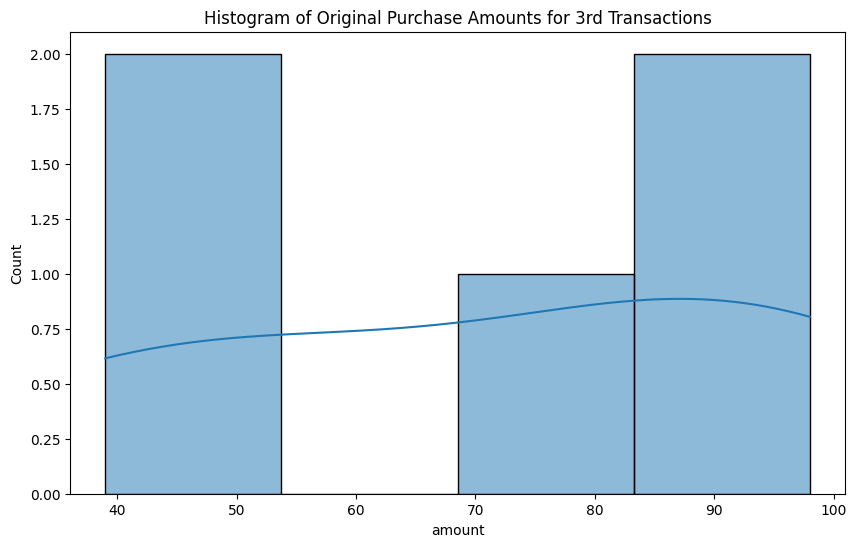

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(b['amount'], kde=True)
plt.title('Histogram of Original Purchase Amounts for 3rd Transactions')
plt.show()

Plot a histogram of discounted amounts for 3rd transactions.

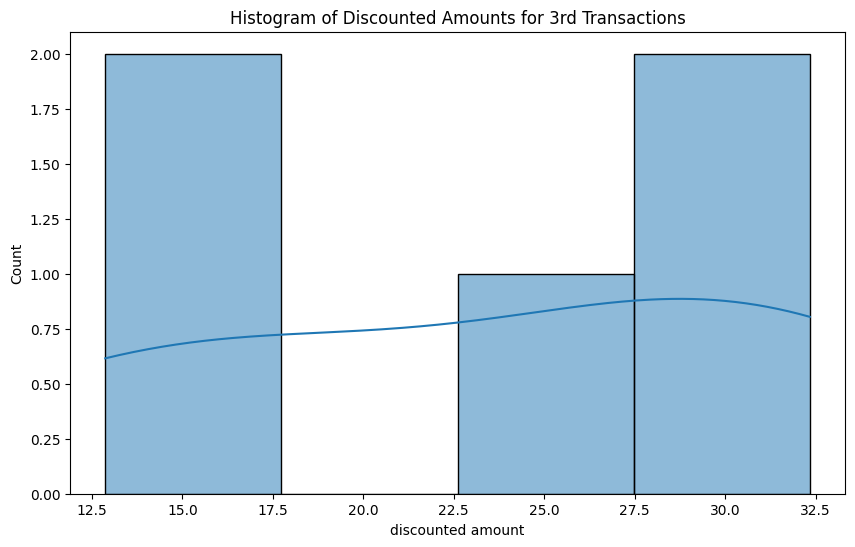

In [38]:
b['discounted amount']=df['amount']*0.33
plt.figure(figsize=(10,6))
sns.histplot(b['discounted amount'], kde=True)
plt.title('Histogram of Discounted Amounts for 3rd Transactions')
plt.show()

#Part 3 – Statistics

Calculate the average amount for all transactions.

In [39]:
print(df['amount'].mean())

54.85


Calculate the average discounted_amount for 3rd transactions.

In [40]:
print(b['discounted amount'].mean())

23.694


Probability: Pick a random transaction — what is the probability that it is a discounted 3rd purchase?

In [41]:
discounted=df['amount'][0]
total=df.shape[0]
prob=discounted/total
print(f"Number of discounted 3rd transactions:{discounted}")
print(f"Total number of transactions:{total}")
print(f"Probability of a random transaction being a discounted 3rd purchase:{prob:.2f}")

Number of discounted 3rd transactions:89
Total number of transactions:100
Probability of a random transaction being a discounted 3rd purchase:0.89


#Part 4 – Linear Algebra & NumPy

Represent amount as a NumPy array.

In [42]:
amounts=df['amount'].to_numpy()
print(amounts)

[89  5 52 19  4 78 72 45 98 65 94 42 43 19 55 50 78 92 30 91 39 58 78 72
 58 43 78  4 39 30 52 94 43 43 39 94 50 78 30 52 30 50 19 78 78 55 19 89
 45 91 45 92  5 72 19 55 52 19 78 98 42  5 78 45 89 50 98 45 78 94 89 43
 43 39 55 55 78 78 91 89 19 92 92 65 43 89 19  4 39 30  5 92 50 43  5 19
 58 65 43 45]


Create a discount vector (0.33 applied only to 3rd purchases, else 0).

In [43]:
dfsort=df.sort_values(by=["customer_id", "transaction_id"])
dfsort['purchase'] = dfsort.groupby('customer_id').cumcount()+1
discount_vector=np.where(dfsort['purchase']==3,0.33,0)
print(discount_vector)

[0.   0.   0.33 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.33 0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.33
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.33 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.33 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


Perform element-wise multiplication to compute discounts.

In [44]:
discount=discount_vector*amounts
print(discount)

[ 0.    0.   17.16  0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 19.14  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.   16.5   0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.   17.16  0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.   25.74  0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.  ]


Compute the total discount given across all customers (dot product).

In [45]:
total_dis=np.dot(amounts,discount).round(2)
print(total_dis)

5727.48


Perform weighted sum using [0.67, 0.33] for non-discounted and discounted transactions.

In [46]:
weighted=np.where(discount_vector==0.33,0.33,0.67)
print(np.sum(weighted).round(2))

65.3


#Part 5 – Calculus

 Find the derivative of Discounted_Amount with respect to Amount (use SymPy).
Interpret the derivative in the context of the problem.

In [47]:
import sympy as sp
Amount, DiscountRate = sp.symbols('Amount DiscountRate')
Discounted_Amount = Amount * (1 - DiscountRate)
derivative = sp.diff(Discounted_Amount, Amount)
print(derivative)

1 - DiscountRate


#Part 6 – Feature Engineering

Create a new column Transaction_Rank (purchase number per customer).

In [48]:
dfnew=df.sort_values(by=["customer_id", "transaction_id"])
dfnew['Transaction_Rank'] = dfsort.groupby('customer_id').cumcount()+1
dfnew

,customer_id,transaction_id,amount,Transaction_Rank
13,1001,225602,19,1
0,1001,339473,89,2
10,1001,374711,94,3
17,1001,445346,92,4
4,1001,530588,4,5
...,...,...,...,...
77,1005,900055,78,22
84,1005,900062,43,23
93,1005,900071,43,24
96,1005,900074,58,25


Create Discount_Applied column (1 if it’s the 3rd purchase, else 0).

In [49]:
dfnew['Discount_Applied']=np.where(dfnew['Transaction_Rank']==3,1,0)
dfnew

,customer_id,transaction_id,amount,Transaction_Rank,Discount_Applied
13,1001,225602,19,1,0
0,1001,339473,89,2,0
10,1001,374711,94,3,1
17,1001,445346,92,4,0
4,1001,530588,4,5,0
...,...,...,...,...,...
77,1005,900055,78,22,0
84,1005,900062,43,23,0
93,1005,900071,43,24,0
96,1005,900074,58,25,0


Create Discounted_Amount column (apply 33% discount for 3rd purchases).

In [50]:
dfnew['Discounted_Amount']=np.where(dfnew['Discount_Applied']==1,dfnew['amount']*0.33,0)
dfnew

,customer_id,transaction_id,amount,Transaction_Rank,Discount_Applied,Discounted_Amount
13,1001,225602,19,1,0,0.00
0,1001,339473,89,2,0,0.00
10,1001,374711,94,3,1,31.02
17,1001,445346,92,4,0,0.00
4,1001,530588,4,5,0,0.00
...,...,...,...,...,...,...
77,1005,900055,78,22,0,0.00
84,1005,900062,43,23,0,0.00
93,1005,900071,43,24,0,0.00
96,1005,900074,58,25,0,0.00


Create Savings column = amount - discounted_amount.

In [51]:
dfnew['Savings']=dfnew['amount']-dfnew['Discounted_Amount']
dfnew

,customer_id,transaction_id,amount,Transaction_Rank,Discount_Applied,Discounted_Amount,Savings
13,1001,225602,19,1,0,0.00,19.00
0,1001,339473,89,2,0,0.00,89.00
10,1001,374711,94,3,1,31.02,62.98
17,1001,445346,92,4,0,0.00,92.00
4,1001,530588,4,5,0,0.00,4.00
...,...,...,...,...,...,...,...
77,1005,900055,78,22,0,0.00,78.00
84,1005,900062,43,23,0,0.00,43.00
93,1005,900071,43,24,0,0.00,43.00
96,1005,900074,58,25,0,0.00,58.00


#Part 7 – SQL Simulation in Pandas

Select only rows where Discount_Applied = 1.

In [52]:
dfnew[dfnew['Discount_Applied']==1]

,customer_id,transaction_id,amount,Transaction_Rank,Discount_Applied,Discounted_Amount,Savings
10,1001,374711,94,3,1,31.02,62.98
15,1002,415562,50,3,1,16.50,33.50
20,1003,102487,39,3,1,12.87,26.13
5,1004,528902,78,3,1,25.74,52.26
8,1005,500607,98,3,1,32.34,65.66


Output columns: customer_id, transaction_id, amount, discounted_amount.

In [53]:
dfnew[['customer_id','transaction_id','amount','Discounted_Amount']]

,customer_id,transaction_id,amount,Discounted_Amount
13,1001,225602,19,0.00
0,1001,339473,89,0.00
10,1001,374711,94,31.02
17,1001,445346,92,0.00
4,1001,530588,4,0.00
...,...,...,...,...
77,1005,900055,78,0.00
84,1005,900062,43,0.00
93,1005,900071,43,0.00
96,1005,900074,58,0.00


Sort by customer_id ascending.

In [54]:
dfnew

,customer_id,transaction_id,amount,Transaction_Rank,Discount_Applied,Discounted_Amount,Savings
13,1001,225602,19,1,0,0.00,19.00
0,1001,339473,89,2,0,0.00,89.00
10,1001,374711,94,3,1,31.02,62.98
17,1001,445346,92,4,0,0.00,92.00
4,1001,530588,4,5,0,0.00,4.00
...,...,...,...,...,...,...,...
77,1005,900055,78,22,0,0.00,78.00
84,1005,900062,43,23,0,0.00,43.00
93,1005,900071,43,24,0,0.00,43.00
96,1005,900074,58,25,0,0.00,58.00


#Part 8 – Insights

Which customer received the largest discount?

In [55]:
dfnew[dfnew['Discounted_Amount']==dfnew['Discounted_Amount'].max()]

,customer_id,transaction_id,amount,Transaction_Rank,Discount_Applied,Discounted_Amount,Savings
8,1005,500607,98,3,1,32.34,65.66


What is the total amount Kelly discounted across all customers?

In [56]:
print('Total amount kelly discounted all customer:')
print(dfnew['Discounted_Amount'].sum())

Total amount kelly discounted all customer:
118.47


What is the average saving per customer?

In [57]:
print('The average saving per customer')
print(dfnew['Savings'].mean().round(2))

The average saving per customer
53.67


Which customers spent the most after the discount?

In [58]:
spent=dfnew.groupby('customer_id')['Discounted_Amount'].sum().sort_values(ascending=False).reset_index()
print(spent.head(1))

   customer_id  Discounted_Amount
0         1005              32.34


In [59]:
df['customer_id'].unique()

array([1001, 1002, 1003, 1004, 1005])